# Challenge: What to use
Using selected questions from the 2012 and 2014 editions of the [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html), address the following questions. 

Here is the data [file](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv). And here is the [codebook](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html), with information about the variable coding and content.

In this dataset, participants answered the same questions in 2012 and 2014.

## Nonparametric and Parametric Test
In the literal meaning of the terms, a __parametric__ statistical test is one that makes assumptions about the parameters (defining properties) of the population distribution(s) from which one's data are drawn, while a __non-parametric__ test is one that makes no such assumptions.

### Hypothesis Tests of the Mean and Median 
__Parametric tests (means)__
 * 1-sample t test
 * 2-sample t test
 * One-Way ANOVA
 * Factorial DOE with one factor and one blocking variable
 * Shapiro-Wilk: sensitive to sample size
 * Tukey's Honest Significant Differences (HSD) Test
 
__Nonparametric test (medians)__
 * 1-sample Sign, 1-sample Wilcoxon (dependent samples)
 * Mann-Whitney test (indendepent samples)
 * Kruskal-Wallis, Mood's median test 
 * Friedman test 
 
### Reasons to use Parametric Tests 
 1. Parametric tests can perform well with skewed and nonnormal distributions if sample size is big enough <br>
  - __1-sample t test__: sample size greater than 20 
  - __2-sample t test__: each group should be greater than 15 
  - __One-Way ANOVA__: each group should be greater than 15 for 2-9 groups; each group should be greater than 20 if you have 10-12 groups<br>

 2. Parametric tests can perform well when the spread of each group is different
 3. Parametric tests usually have more statistical power than nonparametric tests; more likely to detect a significant effect when one truly exists
 
### Reasons to use Nonparametric Tests 
 1. Your area of study is better represented by the median (i.e. income right skewed due to a few billionaires)
 2. You have a very small sample size
 3. You have ordinal data, ranked data, or outliers that you can’t remove

In [42]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parametric statistics
from scipy.stats import stats, ttest_ind, f_oneway, ttest_rel, shapiro

# Nonparametric statistics
from scipy.stats import kruskal, wilcoxon, mannwhitneyu

# Test for normality
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Load in data
df_raw = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
df_raw.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


### Variable Description 

* __cntry__: Country 
* __year__: ESS round (6: 2012, 7: 2014)
* __idno__: Respondent's identification number 
* __tvtot__: TV watching, total time on average weekday 
    - 0: no time to 7: more than 3 hr
* __ppltrst__: Most people can be trusted or you can't be too careful 
    - 0: you can't be too careful to 10: most people can be trusted
* __pplfair__: Most people try to take advantage of you, or try to be fair 
    - 0: most people try to take advantage of me to 10: most people try to be fair
* __pplhlp__: Most of the time people helpful or mostly looking out for themselves 
    - 0: people mostly look out for themselves to 10: people mostly try to be helpful
* __happy__: How happy are you 
    - 0: extremely unhappy to 10: extremely happy
* __sclmeet__: How often socially meet with friends, relatives or colleagues 
    - 1: never to 7: everyday
* __sclact__: Take part in social activities compared to others of same age 
    - 1: much less than most to 5: much more than most
* __gndr__: Gender (1: male or 2: female)
* __agea__: Age of respondent, calculated 
* __partner__: Lives with partner at household grid 
    - 1: lives with or 2: does not

In [3]:
df_raw.shape

(8594, 13)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 873.0+ KB


In [5]:
df = df_raw.dropna()

In [6]:
df.shape

(8147, 13)

Looks like we lost about 400 rows after dropping missing values. 

### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

Before we select which distribution comparision test to use, we will take a look at the distribution of the countries by plotting histograms of trust for each country. 

In [7]:
# Sample size for each country 
df['cntry'].value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64

Distribution of Trust of European Countries in 2012 and 2014


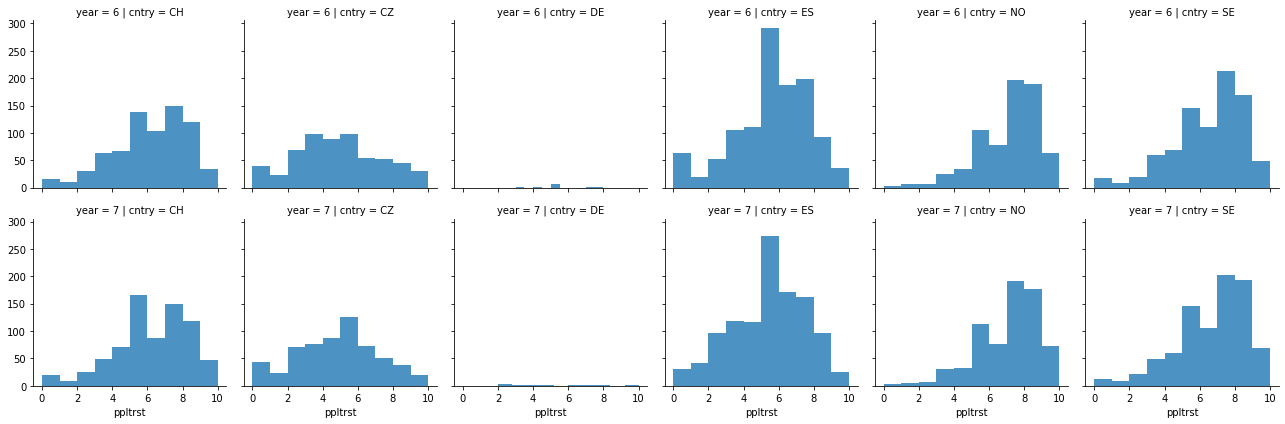

In [8]:
# Plot histogram for trust of each country per year 
g = sns.FacetGrid(df, row='year', col='cntry')
g = g.map(plt.hist, 'ppltrst', alpha=0.8)
print('Distribution of Trust of European Countries in 2012 and 2014')
plt.show()

Most of the histograms do not look normally distributed. So we'll use a non-parametric test, such as Wilcoxon sign-rank to determine if there are diffrences between responses from 2012 to 2014

In [9]:
# Wilcoxon Signed Rank Test for each country
cntrys = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']

# Had to use raw df because sample sizes were not equal
print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    # Isolating data from each country
    country = df_raw[df_raw.cntry ==cnt]
    # Printing Wilcoxon test results
    print(cnt, wilcoxon(country[country.year == 6].ppltrst, 
                        y=country[country.year == 7].ppltrst))

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)
CZ WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)
DE WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)
ES WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)
NO WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)
SE WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)


/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


From the Wilcoxon sign-rank test, Estonia and Sweden returned signficant p-values. Estonians has become more trusting since 2012 while Swedes have become less trusting. 

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

Distribution of Happiness of European Countries in 2012 and 2014


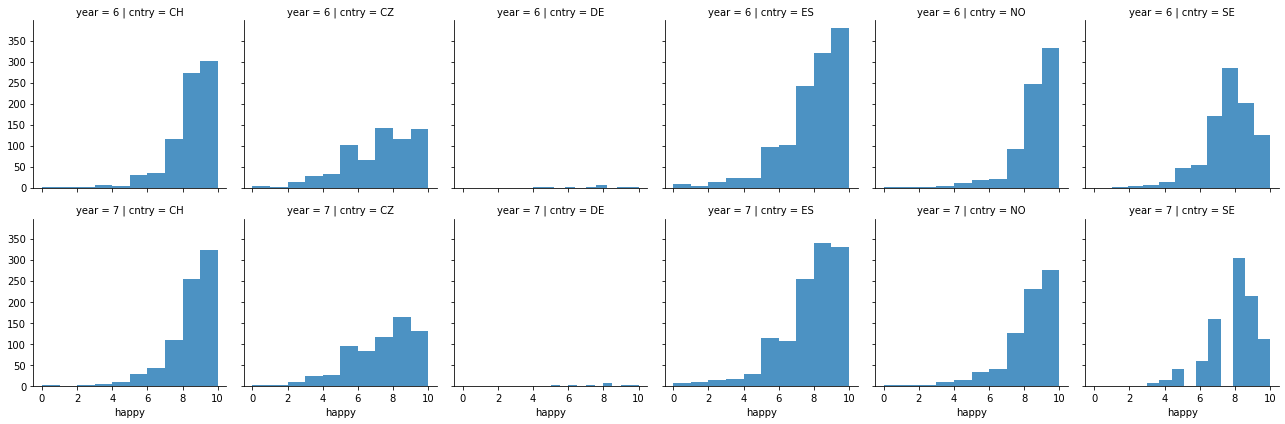

In [11]:
# Plot histogram for trust of each country per year 
g = sns.FacetGrid(df_raw, row='year', col='cntry')
g = g.map(plt.hist, 'happy', alpha=0.8)
print('Distribution of Happiness of European Countries in 2012 and 2014')
plt.show()

At a glance, the distributions are left skewed. We'll continue with the Wilcoxon sign-rank test to see if there has been a change in happiness from 2012 to 2014.

In [12]:
# Wilcoxon Signed Rank Test for each country
cntrys = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']

# Had to use raw df because sample sizes were not equal
print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    # Isolating data from each country
    country = df_raw[df_raw.cntry ==cnt]
    # Printing Wilcoxon test results
    print(cnt, wilcoxon(country[country.year == 6].happy, 
                        y=country[country.year == 7].happy))

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)
CZ WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)
DE WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)
ES WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)
NO WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)
SE WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)


In [34]:
# df ES
df_ES = df_raw[df_raw['cntry']=='ES']

In [35]:
# df ES
df_NO = df_raw[df_raw['cntry']=='NO']

In [36]:
print('Median Happiness for ES in 2012:', df_ES[df_ES.year == 6].happy.median())
print('Median Happiness for ES in 2014:', df_ES[df_ES.year == 7].happy.median())

Median Happiness for ES in 2012: 8.0
Median Happiness for ES in 2014: 8.0


In [38]:
print('Median Happiness for NO in 2012:', df_NO[df_NO.year == 6].happy.median())
print('Median Happiness for NO in 2014:', df_NO[df_NO.year == 7].happy.median())

Median Happiness for NO in 2012: 8.0
Median Happiness for NO in 2014: 8.0


Based on the test, Czech Republic and Norway returned signficant values. However, when comparing the median happiness between 2012 and 2014, happiness ratings did not change. 

### 3. Who reported watching more TV in 2012, men or women?

In [20]:
# df for 2012 
df_12 = df_raw[df_raw['year']==6]

In [21]:
df_12.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [22]:
# Check sample size of each gender
df_12.gndr.value_counts()

1.0    2154
2.0    2143
Name: gndr, dtype: int64

Distribution of Total TV Watching in 2012 by Gender


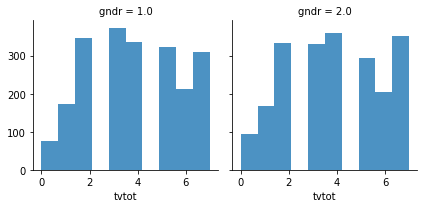

In [23]:
# Plot histogram for gender of each country in 2012 
g = sns.FacetGrid(df_12,col='gndr')
g = g.map(plt.hist, 'tvtot', alpha=0.8)
print('Distribution of Total TV Watching in 2012 by Gender')
plt.show()

This looks like a non-normal distribution. 

In [25]:
# Wilcoxon Signed Rank Test
print('Wilcoxon Test:', wilcoxon(df_12[df_12.gndr == 1].tvtot.dropna()[:2140], 
                                 y=df_12[df_12.gndr == 2].tvtot.dropna()))

Wilcoxon Test: WilcoxonResult(statistic=782530.0, pvalue=0.5033507782372963)


There is not a statistical significance between viewership of gender.

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

Distribution of Fairness in 2012 for People who Live with and without a Partner


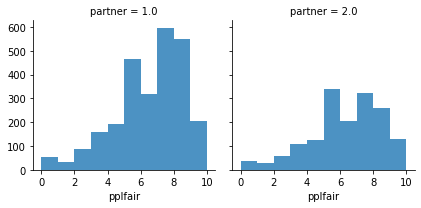

In [26]:
# Plot histogram for partner of each country in 2012 
g = sns.FacetGrid(df_12,col='partner')
g = g.map(plt.hist, 'pplfair', alpha=0.8)
print('Distribution of Fairness in 2012 for People who Live with and without a Partner')
plt.show()

In [27]:
# Check sample size of partner
df_12.partner.value_counts()

1.0    2674
2.0    1616
Name: partner, dtype: int64

The histograms look slightly left skewed. 

In [29]:
# Wilcoxon Signed Rank Test
print('Wilcoxon Test:', wilcoxon(df_12[df_12.partner == 1].pplfair.dropna()[:1608], 
                                 y=df_12[df_12.partner == 2].pplfair.dropna()))

Wilcoxon Test: WilcoxonResult(statistic=426739.0, pvalue=0.004340158276254172)


In [30]:
print('Median Fairness for People living with Partners:', df_12[df_12.partner == 1].pplfair.median())
print('Median Fairness for People living Alone:', df_12[df_12.partner == 2].pplfair.median())

Median Fairness for People living with Partners: 7.0
Median Fairness for People living Alone: 6.0


There was statistical significance between single people and couples in their perception of fairness. Couples were more likely to believe people were fair than single people.

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [39]:
# Select countries in 2014
cntry_list = ['CH', 'CZ', 'DE', 'ES']
df_cntry = df_raw[(df_raw.cntry.isin(cntry_list)) & (df_raw.year == 7)]

Distribution of Social Meetings in 2014 for Four European Countries


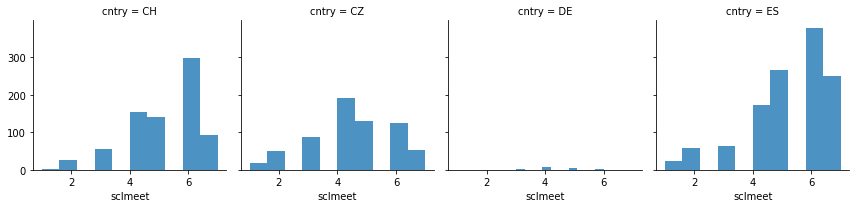

In [40]:
# Plot histogram for social meetings of each country per year 
g = sns.FacetGrid(df_cntry, col='cntry')
g = g.map(plt.hist, 'sclmeet', alpha=0.8)
print('Distribution of Social Meetings in 2014 for Four European Countries')
plt.show()

The distributions look slightly skewed. We'll use the Kruskal-Wallis test since there are multiple independent groups.

In [41]:
# Printing Kruskal test statistic
print(kruskal(df_cntry[df_cntry.cntry == 'CH'].sclmeet.dropna(),
             df_cntry[df_cntry.cntry == 'CZ'].sclmeet.dropna(),
             df_cntry[df_cntry.cntry == 'DE'].sclmeet.dropna(),
             df_cntry[df_cntry.cntry == 'ES'].sclmeet.dropna()))

KruskalResult(statistic=155.8701404987426, pvalue=1.426627190041968e-33)


There does appear to be statistical significance in social meetings between the four countries. 

In [43]:
# Printing all combinations of tests
print('CH vs CZ:', mannwhitneyu(df_cntry[df_cntry.cntry == 'CH'].sclmeet.dropna(),
             df_cntry[df_cntry.cntry == 'CZ'].sclmeet.dropna()))
print('CH vs DE:', mannwhitneyu(df_cntry[df_cntry.cntry == 'CH'].sclmeet.dropna(),
             df_cntry[df_cntry.cntry == 'DE'].sclmeet.dropna()))
print('CH vs ES:', mannwhitneyu(df_cntry[df_cntry.cntry == 'ES'].sclmeet.dropna(),
             df_cntry[df_cntry.cntry == 'ES'].sclmeet.dropna()))
print('CZ vs DE:', mannwhitneyu(df_cntry[df_cntry.cntry == 'CZ'].sclmeet.dropna(),
             df_cntry[df_cntry.cntry == 'DE'].sclmeet.dropna()))
print('CZ vs ES:', mannwhitneyu(df_cntry[df_cntry.cntry == 'CZ'].sclmeet.dropna(),
             df_cntry[df_cntry.cntry == 'ES'].sclmeet.dropna()))
print('DE vs ES:', mannwhitneyu(df_cntry[df_cntry.cntry == 'DE'].sclmeet.dropna(),
             df_cntry[df_cntry.cntry == 'ES'].sclmeet.dropna()))

CH vs CZ: MannwhitneyuResult(statistic=181893.5, pvalue=3.373385591211263e-21)
CH vs DE: MannwhitneyuResult(statistic=3287.5, pvalue=0.004537539213790559)
CH vs ES: MannwhitneyuResult(statistic=733260.5, pvalue=0.49998808761169455)
CZ vs DE: MannwhitneyuResult(statistic=4480.0, pvalue=0.440641245267596)
CZ vs ES: MannwhitneyuResult(statistic=268492.5, pvalue=2.497922348575065e-32)
DE vs ES: MannwhitneyuResult(statistic=4744.5, pvalue=0.0017891971125532805)


There was statistical significance in soical meetings between the following countries: 
* Switzerland vs Denmark
* Czech Republic vs Estonia
* Denmark vs Estonia

The Czech Republic and Estonia stands out the most with having the most signficance difference. 

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

Distribution of Social Activities in 2014 for Four European Countries


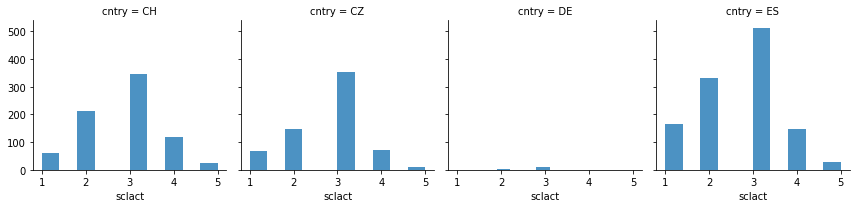

In [44]:
# Plot histogram for social meetings of each country per year 
g = sns.FacetGrid(df_cntry, col='cntry')
g = g.map(plt.hist, 'sclact', alpha=0.8)
print('Distribution of Social Activities in 2014 for Four European Countries')
plt.show()

These distributions are slight non-normal so I will continue with Mann-whitney test.

In [45]:
# Printing all combinations of tests
print('CH vs CZ:', mannwhitneyu(df_cntry[df_cntry.cntry == 'CH'].sclact.dropna(),
             df_cntry[df_cntry.cntry == 'CZ'].sclact.dropna()))
print('CH vs DE:', mannwhitneyu(df_cntry[df_cntry.cntry == 'CH'].sclact.dropna(),
             df_cntry[df_cntry.cntry == 'DE'].sclact.dropna()))
print('CH vs ES:', mannwhitneyu(df_cntry[df_cntry.cntry == 'ES'].sclact.dropna(),
             df_cntry[df_cntry.cntry == 'ES'].sclact.dropna()))
print('CZ vs DE:', mannwhitneyu(df_cntry[df_cntry.cntry == 'CZ'].sclact.dropna(),
             df_cntry[df_cntry.cntry == 'DE'].sclact.dropna()))
print('CZ vs ES:', mannwhitneyu(df_cntry[df_cntry.cntry == 'CZ'].sclact.dropna(),
             df_cntry[df_cntry.cntry == 'ES'].sclact.dropna()))
print('DE vs ES:', mannwhitneyu(df_cntry[df_cntry.cntry == 'DE'].sclact.dropna(),
             df_cntry[df_cntry.cntry == 'ES'].sclact.dropna()))

CH vs CZ: MannwhitneyuResult(statistic=240920.5, pvalue=0.13888167266065093)
CH vs DE: MannwhitneyuResult(statistic=5241.5, pvalue=0.44256932185886466)
CH vs ES: MannwhitneyuResult(statistic=702112.5, pvalue=0.4999873206108174)
CZ vs DE: MannwhitneyuResult(statistic=4508.5, pvalue=0.4746220491255344)
CZ vs ES: MannwhitneyuResult(statistic=361555.0, pvalue=0.010061799842787184)
DE vs ES: MannwhitneyuResult(statistic=7669.0, pvalue=0.30344836893147775)


There was only statistical significance in soical activties between Czech Republic and Estonia.